In [35]:
#This notebook is for managing, analyzing, and visualizing the output from HGTector run on the Marinobacter pangenome

#required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
import glob

In [36]:
#HGTector outputs a file for each genome with which genes appear to be horizontally transferred
#Need to get each of these and match the genes with annotations assigned using anvio

hgt_files = [] #empty list for glob to populate with filepaths to each output file
for file in glob.glob('./all/analysis-self-low/hgts/*.txt'): #find the output files in my directory using a wildcard approach
    hgt_files.append(file)

hgt_files = sorted(hgt_files) #put the files in order (alphabetical, upper then lowercase)

#This is a mess but it was worse
#Creating an individual df for each hgt output file
#before the '=', just creating variable names in order given by `sorted`
CB1_hgt,CBIA_hgt,CBIW17_hgt,CBIW18_hgt,M1C_hgt,M2C_hgt,M3C_hgt,M4C_hgt,adhaerens_hgt,algicola_hgt,\
antarcticus_hgt,aromaticivorans_hgt,bohaiensis_hgt,changyiensis_hgt,\
confluentis_hgt,daepoensis_hgt,daqiaonensis_hgt,excellens_hgt,flavimaris_hgt,fonticola_hgt,fuscus_hgt,\
gelidimuriae_hgt,gudaonensis_hgt,guineae_hgt,halophilus_hgt,\
halotolerans_hgt,hydrocarbonoclasticus_hgt,lipolyticus_hgt,litoralis_hgt,lutaoensis_hgt,manganoxydans_hgt,\
maritimus_hgt,mobilis_hgt,nanhaiticus_hgt,nitratireducens_hgt,\
pelagius_hgt,persicus_hgt,piscensis_hgt,profundi_hgt,psychrophilus_hgt,salarius_hgt,salexigens_hgt,\
salicampi_hgt,salinus_hgt,salsuginis_hgt,santoriniensis_hgt,\
segnicrescens_hgt,shengliensis_hgt,similis_hgt,subterrani_hgt,vinifirmus_hgt,vulgaris_hgt,zhejiangensis_hgt \
= [pd.read_csv(item, sep='\t', names=['gene_callers_id','score','taxon']) for item in hgt_files] #loop to create df to assign to each variable

#list of those dfs for later use
hgts = [adhaerens_hgt,algicola_hgt,antarcticus_hgt,aromaticivorans_hgt,bohaiensis_hgt,CB1_hgt,CBIA_hgt,
        CBIW17_hgt,CBIW18_hgt,changyiensis_hgt,confluentis_hgt,daepoensis_hgt,daqiaonensis_hgt,excellens_hgt,
        flavimaris_hgt,fonticola_hgt,fuscus_hgt,gelidimuriae_hgt,gudaonensis_hgt,guineae_hgt,halophilus_hgt,
        halotolerans_hgt,hydrocarbonoclasticus_hgt,lipolyticus_hgt,litoralis_hgt,lutaoensis_hgt,M1C_hgt,M2C_hgt,
        M3C_hgt,M4C_hgt,manganoxydans_hgt,maritimus_hgt,mobilis_hgt,nanhaiticus_hgt,nitratireducens_hgt,pelagius_hgt,
        persicus_hgt,piscensis_hgt,profundi_hgt,psychrophilus_hgt,salarius_hgt,salexigens_hgt,salicampi_hgt,
        salinus_hgt,salsuginis_hgt,santoriniensis_hgt,segnicrescens_hgt,shengliensis_hgt,similis_hgt,subterrani_hgt,
        vinifirmus_hgt,vulgaris_hgt,zhejiangensis_hgt]

In [37]:
#same logic for creating dataframes for each gene annotation file as above
#both files have the same corresponding 'gene_callers_id' assigned to each gene in the anvio workflow
#using that ID to merge possible HGT with functional annotation below
func_files = []
for file in glob.glob('../dbs/functions/*.db.func.txt'):
    func_files.append(file)

func_files = sorted(func_files)

#slightly different order since the MAG files are lowercase in this directory
M1C_func,M2C_func,M3C_func,M4C_func,adhaerens_func,algicola_func,antarcticus_func,\
aromaticivorans_func,bohaiensis_func,CB1_func,CBIA_func,CBIW17_func,CBIW18_func,\
changyiensis_func,confluentis_func,daepoensis_func,daqiaonensis_func,excellens_func,\
flavimaris_func,fonticola_func,fuscus_func,gelidimuriae_func,\
gudaonensis_func,guineae_func,halophilus_func,halotolerans_func,hydrocarbonoclasticus_func,\
lipolyticus_func,litoralis_func,lutaoensis_func,manganoxydans_func,maritimus_func,mobilis_func,\
nanhaiticus_func,nitratireducens_func,pelagius_func,persicus_func,piscensis_func,profundi_func,\
psychrophilus_func,salarius_func,salexigens_func,salicampi_func,salinus_func,salsuginis_func,\
santoriniensis_func,segnicrescens_func,shengliensis_func,similis_func,subterrani_func,\
vinifirmus_func,vulgaris_func,zhejiangensis_func\
= [pd.read_csv(item, sep='\t') for item in func_files]

funcs = [adhaerens_func,algicola_func,antarcticus_func,aromaticivorans_func,bohaiensis_func,
         CB1_func,CBIA_func,CBIW17_func,CBIW18_func,changyiensis_func,confluentis_func,
         daepoensis_func,daqiaonensis_func,excellens_func,flavimaris_func,fonticola_func,
         fuscus_func,gelidimuriae_func,gudaonensis_func,guineae_func,halophilus_func,
         halotolerans_func,hydrocarbonoclasticus_func,lipolyticus_func,litoralis_func,
         lutaoensis_func,M1C_func,M2C_func,M3C_func,M4C_func,manganoxydans_func,maritimus_func,
         mobilis_func,nanhaiticus_func,nitratireducens_func,pelagius_func,persicus_func,
         piscensis_func,profundi_func,psychrophilus_func,salarius_func,salexigens_func,
         salicampi_func,salinus_func,salsuginis_func,santoriniensis_func,segnicrescens_func,
         shengliensis_func,similis_func,subterrani_func,vinifirmus_func,vulgaris_func,zhejiangensis_func]

In [38]:
#the hgts, funcs, and species lists are all in the same alphabetical order for looping together later
#list of species
species = ['adhaerens','algicola','antarcticus','aromaticivorans','bohaiensis',
           'CB1','CBIA','CBIW17','CBIW18','changyiensis','confluentis','daepoensis',
           'daqiaonensis','excellens','flavimaris','fonticola','fuscus','gelidimuriae',
           'gudaonensis','guineae','halophilus','halotolerans','hydrocarbonoclasticus',
           'lipolyticus','litoralis','lutaoensis','M1C','M2C','M3C','M4C','manganoxydans',
           'maritimus','mobilis','nanhaiticus','nitratireducens','pelagius','persicus',
           'piscensis','profundi','psychrophilus','salarius','salexigens','salicampi',
           'salinus','salsuginis','santoriniensis','segnicrescens','shengliensis','similis',
           'subterrani','vinifirmus','vulgaris','zhejiangensis']

#list of species in order based on clade assignments and core phylogeny
species_ordered_108 = ['profundi','mobilis','zhejiangensis','daqiaonensis','segnicrescens',
                       'bohaiensis','fonticola','nanhaiticus','changyiensis','salicampi',
                       'lipolyticus','confluentis','halotolerans','vulgaris','algicola',
                       'salarius','gelidimuriae','psychrophilus','M3C','M1C','M2C','M4C',
                       'CB1','CBIA','CBIW17','CBIW18','piscensis','aromaticivorans',
                       'salexigens','antarcticus','maritimus','gudaonensis','salsuginis',
                       'adhaerens','flavimaris','manganoxydans','guineae','subterrani',
                       'nitratireducens','salinus','similis','persicus','fuscus','daepoensis',
                       'hydrocarbonoclasticus','shengliensis','excellens','halophilus',
                       'vinifirmus','litoralis','lutaoensis','pelagius','santoriniensis']

#details to add to each df that include genome statistics and clade assignments
details = pd.read_csv('/Users/zac/Documents/workspace/mbpan/MARINO/SUMMARY_all_genes/misc_data_layers/default.txt',
                      sep='\t',index_col='layers')
details.rename({'Marinobacter_CB1':'CB1','Marinobacter_CBIA':'CBIA',
                'Marinobacter_CBIW17':'CBIW17','Marinobacter_CBIW18':'CBIW18'},inplace=True)
details_df = details.reindex(species)

In [204]:
#function to put the hgts and funcs together, merging on the 'gene_callers_id'
#By default, we have COG category and functional annotations. 
#Added optional variables to specify what kind of output to retrieve
def merge_hgt_func(df_hgt,df_func,name,prot=True,cat=False): #must input specific df for hgt and function and name of species (string) 
    #merge the hgt output and the function output and scale to size of HGT output (left)
    df = df_hgt.merge(df_func, on='gene_callers_id',how='left')
    df['species'] = f'{name}' #add species name in a column
    
    #determine whether we want COG function, category, or both
    #default is to return COG function only
    if prot == True and cat == True: #returns both function and category
        return df
    elif prot == True and cat == False: #returns only function, default behavior
        df1 = df[df['source'].str.contains("COG_FUNCTION", na=True)] #na=True keeps non-annotated genes (duplicated)
        df1 = df1.drop_duplicates(subset=['gene_callers_id']) #non-annotated genes don't have "function" so we remove the duplicate from the data
        df1 = df1.fillna('None') #Set name of non-annotated genes to 'None'
        return df1
    elif prot == False and cat == True: #returns only category
        df1 = df[df['source'].str.contains("COG_CATEGORY", na=True)]
        df1 = df1.drop_duplicates(subset=['gene_callers_id'])
        df1 = df1.fillna('None')
        return df1        

In [205]:
#example output from function merge
df_M3C = merge_hgt_func(M3C_hgt,M3C_func,'M3C',prot=False,cat=True)
df_M3C

,gene_callers_id,score,taxon,source,accession,function,e_value,species
1,15,0.529045,Proteobacteria,COG_CATEGORY,X,X,0,M3C
3,16,0.628682,Proteobacteria,COG_CATEGORY,R,R,0,M3C
5,34,0.542007,Geobacter sp. OR-1,COG_CATEGORY,M,M,0,M3C
7,37,0.601694,cellular organisms,COG_CATEGORY,G,G,0,M3C
8,166,0.529261,Bacteria,None,None,None,None,M3C
...,...,...,...,...,...,...,...,...
1480,4662,0.629981,Gammaproteobacteria,COG_CATEGORY,O,O,0,M3C
1482,4663,0.598589,Gammaproteobacteria,COG_CATEGORY,X,X,0,M3C
1483,4672,0.535644,Proteobacteria,None,None,None,None,M3C
1484,4673,0.532188,Proteobacteria,None,None,None,None,M3C


In [206]:
#make df from all species with subset of data for HGT analysis
df_cat_list = [] #empty list to fill with merged hgt and func dfs
for i in range(len(species)): #iterate for every species using index to access the df lists
    df_merge = merge_hgt_func(hgts[i],funcs[i],species[i],prot=False,cat=True) #create df for corresponding dfs at index
    df_temp = df_merge[['gene_callers_id','score','function','species']] #keep only the columns of interest for this analysis
    df_cat_list.append(df_temp) #add df to empty list above

#df_cat_list now contains a df for each species with COG category annotated HGT-genes

In [207]:
#getting the data into an easier to digest format
HGT_cat_sum_list = []
HGT_cat_counts = []
cat_sum_headers = ['Species','Clade','Total genes','Total HGTs','Percent HGTs','Category counts']
for i in range(len(df_cat_list)): #go through each merged df to get information
    #the details df is in the same order as species which is how we created df_cat_list
    deets = details_df.iloc[i] #get genome stats for the indexed species
    tot_genes = deets[4] #total number of genes in the indexed genome
    clade = deets[9] #clade that the genome belongs to
    num_HGTs = len(df_cat_list[i]) #count total number of HGTs
    perc_HGT_genes = (num_HGTs / tot_genes) * 100 #calculate percent of total genes that are HGT genes
    
    df_split = df_cat_list[i]['function'].str.split('!!!', 1, expand=True) #some functions are assigned to multiple categories, we use the first based on Meren's recommendation
    
    df_temp = pd.concat([df_cat_list[i],df_split],axis=1) #adding that first category back to the df in its own column
    cat_counter = df_temp[0].value_counts() #counting total number of each category
    HGT_cat_counts.append(cat_counter) #adding cat counts to the list above for each species
    HGT_cat_sum_list.append([species[i],clade,tot_genes,num_HGTs,perc_HGT_genes,cat_counter]) #adding information to summary list above for each species

HGT_cat_sum_df = pd.DataFrame(HGT_cat_sum_list, columns=cat_sum_headers)  #make dataframe from list of info for each species
tot_gene_df = HGT_cat_sum_df[['Species','Total genes']].set_index('Species') #make df of total genes for each species... for math
HGT_cat_count_df = pd.DataFrame(HGT_cat_counts,index=species) #make df of how many categories were counted for HGT for each species
HGT_cat_rel = (HGT_cat_count_df/tot_gene_df.values) * 100 #here's the math. Divide the number of HGTs by total genes for each genome and calculate percentage
HGT_cat_rel = HGT_cat_rel.reindex(species_ordered_108,copy=False) #put this into phylogenetic order for plotting consistency
HGT_cat_rel = HGT_cat_rel.sort_values(by=species_ordered_108,axis=1,ascending=False) #sort the values from most on average on the left to least on average on the right

In [208]:
#Summary of HGT information for the pangenome
HGT_cat_sum_df

,Species,Clade,Total genes,Total HGTs,Percent HGTs,Category counts
0,adhaerens,V,4353,236,5.421548,None 25 M 23 R 22 X 21 K ...
1,algicola,II,4106,244,5.942523,R 30 K 27 P 23 C 23 No...
2,antarcticus,IV,3440,146,4.244186,E 18 C 16 P 13 S 11 G ...
3,aromaticivorans,IV,3778,283,7.490736,I 43 C 24 None 22 X 22 E ...
4,bohaiensis,I,4291,540,12.584479,K 88 R 62 E 49 G 47 C ...
5,CB1,III,3573,394,11.027148,G 37 K 36 E 30 C 30 R ...
6,CBIA,III,4227,536,12.680388,E 56 K 49 C 44 G 42 P ...
7,CBIW17,III,3231,334,10.337357,None 33 K 33 R 33 E 31 X ...
8,CBIW18,III,4326,566,13.083680,R 64 K 57 G 54 C 50 I ...
9,changyiensis,I,3977,344,8.649736,I 43 E 40 T 36 G 34 R ...


In [211]:
#Getting overall summary info for HGT events in the pangenome
print('Mean HGT (% of total genes) for all genomes:')
print('mean:',HGT_cat_sum_df['Percent HGTs'].mean(),'\u00B1',HGT_cat_sum_df['Percent HGTs'].std())
print('median:',HGT_cat_sum_df['Percent HGTs'].median())
print('min:',HGT_cat_sum_df['Percent HGTs'].min())
print('max:',HGT_cat_sum_df['Percent HGTs'].max())

Mean HGT (% of total genes) for all genomes:
mean: 6.899689303708649 ± 3.7125948113753093
median: 5.2808046940486175
min: 2.538339502908514
max: 16.385747813100064


In [212]:
clades = ['I','II','III','IV','V','VI','VII','VIII']

for clade in clades: #perform the calculation for each clade
    mean = HGT_cat_sum_df[HGT_cat_sum_df['Clade'] == clade]['Percent HGTs'].mean() #get the mean for the specified clade
    std = HGT_cat_sum_df[HGT_cat_sum_df['Clade'] == 'I']['Percent HGTs'].std() #get the standard deviation
    print(f'Mean HGT (% of total genes) for Clade {clade} is {mean:.2g} \u00B1 {std:.2g} %\n')

Mean HGT (% of total genes) for Clade I is 8.8 ± 2.9 %

Mean HGT (% of total genes) for Clade II is 4.9 ± 2.9 %

Mean HGT (% of total genes) for Clade III is 13 ± 2.9 %

Mean HGT (% of total genes) for Clade IV is 5.5 ± 2.9 %

Mean HGT (% of total genes) for Clade V is 4.2 ± 2.9 %

Mean HGT (% of total genes) for Clade VI is 3.6 ± 2.9 %

Mean HGT (% of total genes) for Clade VII is 4.5 ± 2.9 %

Mean HGT (% of total genes) for Clade VIII is 4.8 ± 2.9 %



In [213]:
#setting params to be able to edit text in saved svg (used inkscape to italicize species names and add Clade labels)
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'}
mpl.rcParams.update(new_rc_params)

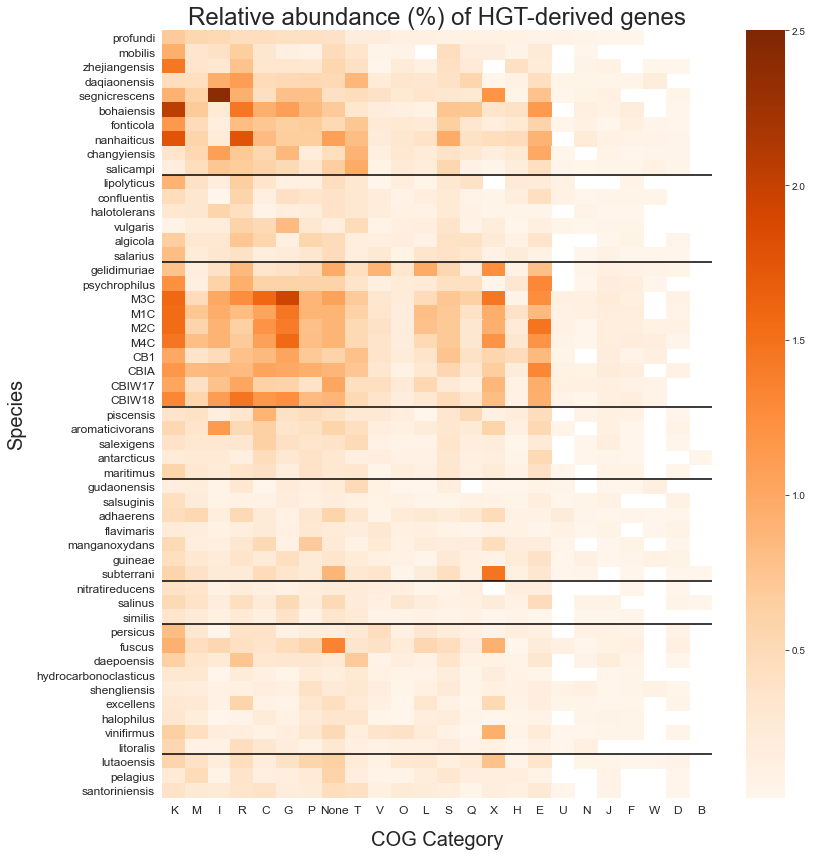

In [215]:
#setting up the plot
sns.set_style('white') #seaborn theme to create figure
fig,ax=plt.subplots(figsize=(12,12)) #establish figure and axes objects and set size
plt.title('Relative abundance (%) of HGT-derived genes',fontsize = 24) #title settings
ax.tick_params(labelsize=12) #setting fontsize for axis ticks (species and COG categories)
ax.hlines([10,16,26,31,38,41,50],xmin=0,xmax=200, colors='black') #adding lines to divide clades
sns.heatmap(data=HGT_cat_rel,cmap='Oranges',vmax=2.5) #create the heatmap object and set colorbar options
plt.ylabel('Species',fontsize = 20, labelpad = 10) #y label settings
plt.xlabel('COG Category',fontsize = 20, labelpad = 15) #x label settings
plt.xticks(rotation=0) #Set x-tick label rotation
plt.tight_layout() #minimize whitespace around figure
#save it if you want
#plt.savefig('../fig_editing/HGTector_COG_relabund_heatmap_v3.svg',dpi=300,format='svg')

In [216]:
#numerical version of heatmap showing percentage of total genes that are derived by HGT for each category
display(HTML(HGT_cat_rel.to_html()))

,K,M,I,R,C,G,P,None,T,V,O,L,S,Q,X,H,E,U,N,J,F,W,D,B
profundi,0.688326,0.550661,0.523128,0.440529,0.440529,0.412996,0.412996,0.385463,0.192731,0.192731,0.137665,0.137665,0.110132,0.110132,0.110132,0.110132,0.082599,0.082599,0.055066,0.027533,0.027533,NaN,NaN,NaN
mobilis,0.940786,0.332042,0.387382,0.664084,0.304372,0.138351,0.110681,0.470393,0.359712,0.055340,0.083011,NaN,0.442723,0.193691,0.193691,0.083011,0.249032,NaN,0.027670,NaN,NaN,NaN,NaN,NaN
zhejiangensis,1.444929,0.354417,0.299891,0.763359,0.327154,0.327154,0.299891,0.545256,0.408942,0.027263,0.218103,0.136314,0.408942,0.245365,NaN,0.408942,0.218103,NaN,0.081788,0.109051,NaN,0.027263,0.027263,NaN
daqiaonensis,0.450197,0.422060,0.956669,1.097355,0.478334,0.506472,0.534609,0.506472,0.872257,0.225098,0.337648,0.309510,0.393922,0.562746,0.028137,0.112549,0.422060,0.056275,0.056275,0.056275,0.056275,0.196961,NaN,NaN
segnicrescens,0.915099,0.610066,2.389426,0.940519,0.432130,0.788002,0.788002,0.406711,0.457550,0.381291,0.279614,0.355872,0.305033,0.279614,1.194713,0.050839,0.762583,0.025419,0.076258,0.127097,NaN,NaN,0.050839,NaN
bohaiensis,2.050804,0.699138,0.256351,1.444885,0.932184,1.095316,0.838965,0.699138,0.326264,0.186437,0.139828,0.116523,0.745747,0.722442,0.349569,0.396178,1.141925,NaN,0.139828,0.093218,0.186437,NaN,0.023305,NaN
fonticola,1.148564,0.474407,0.174782,0.823970,0.724095,0.649189,0.674157,0.524345,0.724095,0.249688,0.274657,0.249688,0.649189,0.324594,0.174782,0.274657,0.599251,0.024969,0.099875,0.024969,0.149813,0.049938,0.024969,NaN
nanhaiticus,1.779065,0.579230,0.227555,1.779065,0.827472,0.661978,0.661978,1.075714,0.806785,0.206868,0.310302,0.372362,0.972280,0.393049,0.455110,0.475796,0.910219,NaN,0.227555,0.103434,0.082747,0.062060,0.041374,NaN
changyiensis,0.352024,0.528036,1.081217,0.704048,0.553181,0.854916,0.201157,0.427458,0.905205,0.150867,0.301735,0.226301,0.377169,0.301735,0.176012,0.276590,1.005783,0.025145,NaN,0.075434,0.025145,0.050289,0.050289,NaN
salicampi,0.175395,0.451015,0.726635,0.676522,0.601353,0.501128,0.325733,0.651466,0.977199,0.075169,0.250564,0.200451,0.551240,0.100226,0.050113,0.200451,0.425958,0.050113,0.025056,0.050113,0.050113,0.100226,0.050113,NaN


In [217]:
#Calculating category means for Clade III
clade_III = ['M1C','M2C','M3C','M4C','CBIA','CB1','CBIW17','CBIW18','psychrophilus','gelidimuriae']
clade_III_hgt_cog_df = HGT_cat_rel.loc[clade_III]
cat_means = clade_III_hgt_cog_df.mean()
print('Mean HGT (% of total genes) in Clade III for each COG category')
print(cat_means)

Mean HGT (% of total genes) in Clade III for each COG category
K       1.261814
M       0.501340
I       0.798087
R       0.929661
C       0.949258
G       1.120740
P       0.727666
None    0.865255
T       0.559821
V       0.392141
O       0.210358
L       0.526429
S       0.583402
Q       0.342152
X       0.871931
H       0.235244
E       1.095069
U       0.093097
N       0.067779
J       0.176783
F       0.145225
W       0.093348
D       0.080669
B            NaN
dtype: float64


In [219]:
#This cell used to count which genes were transferred most to Clade III genomes
HGT_counts = []
for i in range(len(species)): #iterate for every species using index to access the df lists
    df = merge_hgt_func(hgts[i],funcs[i],species[i],prot=True,cat=False) #create df for corresponding dfs at index
    if species[i] in clade_III:
        HGT_counts.append((species[i], df['function'].value_counts()))
        
        #Optional method to count transposase occurrence (or other specific genes)
        #df_transposases = df[df['function'].str.contains("transposase",case=False,na=False)]
        #print(species[i],'\n',df_transposases['accession'].value_counts(),'\n')

#Display top ten HGT-genes counted above based on gene name
for i in HGT_counts:
    print(i[0],'\n',i[1][0:10],'\n')

CB1 
 None                                                                     21
DNA-binding transcriptional regulator, LysR family                       11
TRAP-type C4-dicarboxylate transport system, periplasmic component        7
TRAP-type C4-dicarboxylate transport system, small permease component     6
Site-specific recombinase XerD                                            6
DNA-binding transcriptional regulator, GntR family                        6
Multidrug efflux pump subunit AcrA (membrane-fusion protein)              5
TRAP-type C4-dicarboxylate transport system, large permease component     5
Predicted transposase YdaD                                                5
Acyl-CoA reductase or other NAD-dependent aldehyde dehydrogenase          5
Name: function, dtype: int64 

CBIA 
 None                                                                     37
DNA-binding transcriptional regulator, LysR family                       13
TRAP-type C4-dicarboxylate transport system,